In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

### Example p.44 Duda Book 

In [2]:
# 0. Data to work on

w0_x1 = np.array([3, 1, 3, 5])
w0_x2 = np.array([-4, -2, 0, -2])
w0_class = np.array([0, 0, 0, 0])


w1_x1 = np.array([3, 2, 3, 4])
w1_x2 = np.array([4, 6, 8, 6])
w1_class = np.array([1, 1, 1, 1])

data0 = pd.DataFrame({'x1': w0_x1, 'x2': w0_x2, 'target': w0_class})
data1 = pd.DataFrame({'x1': w1_x1, 'x2': w1_x2, 'target': w1_class})

data01 = pd.concat([data0, data1], ignore_index=True)

# Data to fit
X_01 = data01.drop('target', axis=1)

# target to fit
y_01 = data01['target']

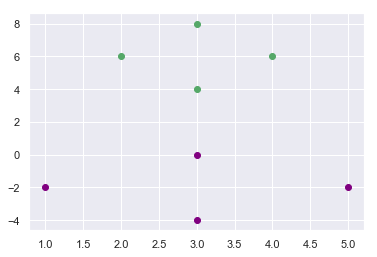

In [11]:
# Plot of the two classes of points
plt.scatter (data0['x1'], data0['x2'], c='purple')
plt.scatter (data1['x1'], data1['x2'], c='g');

In [6]:
# This is the median of u2 in the example in the lecture notes
np.mean(data0[['x1', 'x2']]) # purple points

x1    3.0
x2   -2.0
dtype: float64

In [12]:
# This is the median of u1 in the example in the lecture notes
np.mean(data1[['x1', 'x2']]) # green points

x1    3.0
x2    6.0
dtype: float64

### Let's apply naive bayes classification (numerically)

In [13]:
# 1. Choose model
from sklearn.naive_bayes import GaussianNB

In [14]:
#2. Model instance  
model = GaussianNB()

In [15]:
# 3. Train model
model.fit(X_01, y_01)

GaussianNB(priors=None)

In [18]:
# 4. Make some predictions
X_test = pd.DataFrame({'x1': [1.5, 3], 'x2': [-2, -2]})
y_test = pd.DataFrame({'target': [0, 0]})

y_predict = model.predict(X_test)

y_predict

array([0, 0])

In [19]:
# Predictions on bigger test
X_test = pd.DataFrame({'x1': 6*np.random.rand(60), 'x2': 12*np.random.rand(60)-4})
y_predict = model.predict(X_test)


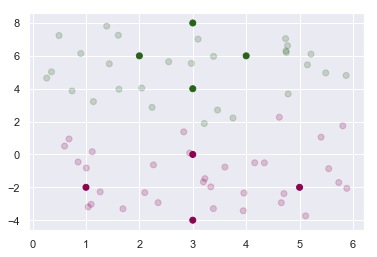

In [20]:
plt.scatter (data01['x1'], data01['x2'], c=data01['target'], cmap='PiYG')
plt.scatter (X_test['x1'], X_test['x2'], c=y_predict, cmap='PiYG', alpha=0.2);

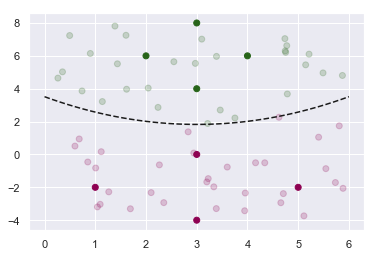

In [21]:
# This is the problem's solution when solved mathematically
x = np.linspace(0, 6, 40)
y = 0.1875*(x**2) + -1.125*x + 3.514

plt.scatter (data01['x1'], data01['x2'], c=data01['target'], cmap='PiYG')
plt.scatter (X_test['x1'], X_test['x2'], c=y_predict, cmap='PiYG', alpha=0.2)
plt.plot(x, y, '--k');

### Example 2, moving the points a bit

In [25]:
# 0. Data to work on

w0_x1 = np.array([3, 2, 3, 4])
w0_x2 = np.array([-4, -2, 0, -2])
w0_class = np.array([0, 0, 0, 0])

w1_x1 = np.array([3, 2, 3, 4])
w1_x2 = np.array([4, 6, 8, 6])
w1_class = np.array([1, 1, 1, 1])

data0 = pd.DataFrame({'x1': w0_x1, 'x2': w0_x2, 'target': w0_class})
data1 = pd.DataFrame({'x1': w1_x1, 'x2': w1_x2, 'target': w1_class})

data01 = pd.concat([data0, data1], ignore_index=True)

# Data to fit
X_01 = data01.drop('target', axis=1)

# target to fit
y_01 = data01['target']

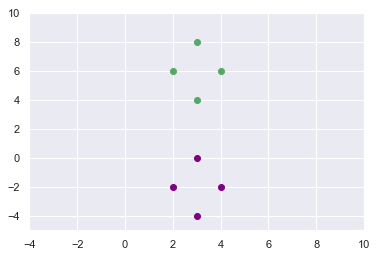

In [26]:
# Plot of the two classes of points
plt.scatter (data0['x1'], data0['x2'], c='purple')
plt.scatter (data1['x1'], data1['x2'], c='g')
plt.xlim(-4, 10)
plt.ylim(-5, 10);

In [27]:
# Train model
model.fit(X_01, y_01)

# Predictions on bigger datasets
X_test = pd.DataFrame({'x1': 14*np.random.rand(60)-4, 'x2': 14*np.random.rand(60)-4})
y_predict = model.predict(X_test)

In [28]:
## These decisions are based on probabilities

y_prob = model.predict_proba(X_test)

print ("Read as: x1 x2 prob(x1) prob(x2)")
print ( np.column_stack( (X_test[0:10].round(2), y_prob[0:10].round(2)) ) )

Read as: x1 x2 prob(x1) prob(x2)
[[ 1.97  1.9   0.6   0.4 ]
 [ 1.05  0.17  1.    0.  ]
 [ 5.08  7.3   0.    1.  ]
 [ 0.48 -1.56  1.    0.  ]
 [-1.93  0.95  0.99  0.01]
 [ 3.54  2.42  0.16  0.84]
 [ 1.79 -1.19  1.    0.  ]
 [-2.49 -0.84  1.    0.  ]
 [ 9.93 -1.52  1.    0.  ]
 [-1.22 -1.17  1.    0.  ]]


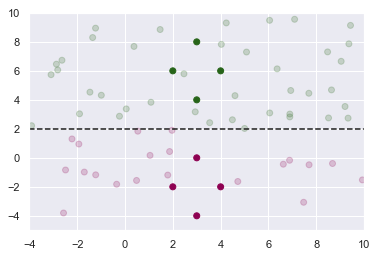

In [31]:
plt.scatter (data01['x1'], data01['x2'], c=data01['target'], cmap='PiYG')
plt.scatter (X_test['x1'], X_test['x2'], c=y_predict, cmap='PiYG', alpha=0.2)
plt.plot([-4, 10], [2, 2], '--k')
plt.xlim(-4, 10)
plt.ylim(-5, 10);

# Mathematically the solution is x2 = 2

### Example 3; Iris data set

In [33]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
iris.shape # This is the size: 150 flower samples; 4 features and the class of flower 

(150, 5)

### We will split all these samples into two groups
- One for training the model
- One for testing the model

In [37]:
from sklearn.model_selection import train_test_split ## previously cross_validation package

In [38]:
X_iris = iris.drop('species', axis = 1)
y_iris = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=1)

In [39]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [40]:
# Training and predicting
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9736842105263158

In [42]:
# A single flower instance
oneinstance = np.array(X_iris.loc[0]).reshape(1, 4)
model.predict(oneinstance), y_iris[0]

(array(['setosa'], dtype='<U10'), 'setosa')

In [43]:
# the probabilities
model.predict_proba(X_test[0:10]).round(2)

array([[1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.97, 0.03],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.5 , 0.5 ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ]])

In [174]:
y_iris.shape

(150,)

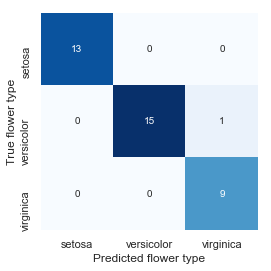

In [71]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_predict)
flower_names = ['setosa', 'versicolor', 'virginica']
matdf = pd.DataFrame(mat, index = flower_names, columns = flower_names)

sns.heatmap(matdf, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel ('Predicted flower type')
plt.ylabel('True flower type');

In [97]:
for i, tflower in enumerate(y_test):
    if tflower == y_predict[i]:
        pass
    else:
        print ("At position %d - Expected: %s but Predicted: %s" % (i, tflower, y_predict[i]))

At position 22 - Expected: versicolor but Predicted: virginica


In [51]:
y_test.values

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype=object)

In [92]:
y_predict

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype='<U10')

In [100]:
#What's this?
1-1.0/38

0.9736842105263158